# BLOB (BINARY LARGE OBJECT)
****

A "blob" is a term often used to refer to a region of an image that differs in properties, such as brightness,color or size, compared to surrounding regions. Essentially, a blob is a group of connected pixels that share some common characteristic or computed property.<p>

<b>cv2.SimpleBlobDetector()</b>

The class implements a simple algorithm for extracting blobs from an image:

1. Convert the source image to binary images by applying thresholding with several thresholds from minThreshold (inclusive) to maxThreshold (exclusive) with distance threshold step between neighboring thresholds.

2. Extract connected components from every binary image by find contours and calculate their centers.

3. Group centers from several binary images by their coordinates. Close centers form one group that corresponds to one blob, which is controlled by the minDistBetweenBlobs parameter.

4. From the groups, estimate final centers of blobs and their radiuses and return as locations and sizes of keypoints.

![Blob](../Graphics/blob.png)

This class performs several filtrations of returned blobs. You should set filterBy to true/false to turn on/off corresponding filtration. 
<b>Available filtrations:</b>

1. <b>Color:</b> This filter compares the intensity of a binary image at the center of a blob to blobColor. If they differ, the blob is filtered out. Use blobColor = 0 to extract dark blobs and blobColor = 255 to extract light blobs.

2. <b>Area:</b> Extracted blobs have an area between minArea (inclusive) and maxArea (exclusive).

3. <b>Circularity: </b> Extracted blobs have circularity ( 4∗π∗Areaperimeter∗perimeter) between minCircularity (inclusive) and maxCircularity (exclusive). This just measures how close to a circle the blob is. E.g. a regular hexagon has higher circularity than, say a square. To filter by circularity, set filterByCircularity = 1.  Then set appropriate values for minCircularity and maxCircularity.  Circularity is defined as (4∗π∗Area)/(perimeter∗perimeter). This means that a circle has a circularity of 1, the circularity of a square is 0.785, and so on.

4. <b>Inertia:</b> Extracted blobs have this ratio between minInertiaRatio (inclusive) and maxInertiaRatio (exclusive). All you have to know is that this measures how elongated a shape is. E.g. for a circle, this value is 1, for an ellipse it is between 0 and 1, and for a line it is 0. To filter by inertia ratio, set filterByInertia = 1, and set 0 ≤ minInertiaRatio ≤ 1and maxInertiaRatio (≤ 1 )appropriately.

5. <b>Convexity:</b> Extracted blobs have convexity (area / area of blob convex hull) between minConvexity (inclusive) and maxConvexity (exclusive). Convexity is defined as the (Area of the Blob / Area of it’s convex hull). Now, Convex Hull of a shape is the tightest convex shape that completely encloses the shape.  To filter by convexity, set filterByConvexity = 1, followed by setting 0 ≤ minConvexity ≤ 1and maxConvexity ( ≤ 1).  A convex shape is a shape where all of its parts "point outwards."  In other words, no part of it points inwards. For example, a circle is a convex shape as its full outline (circumference) points outwards.



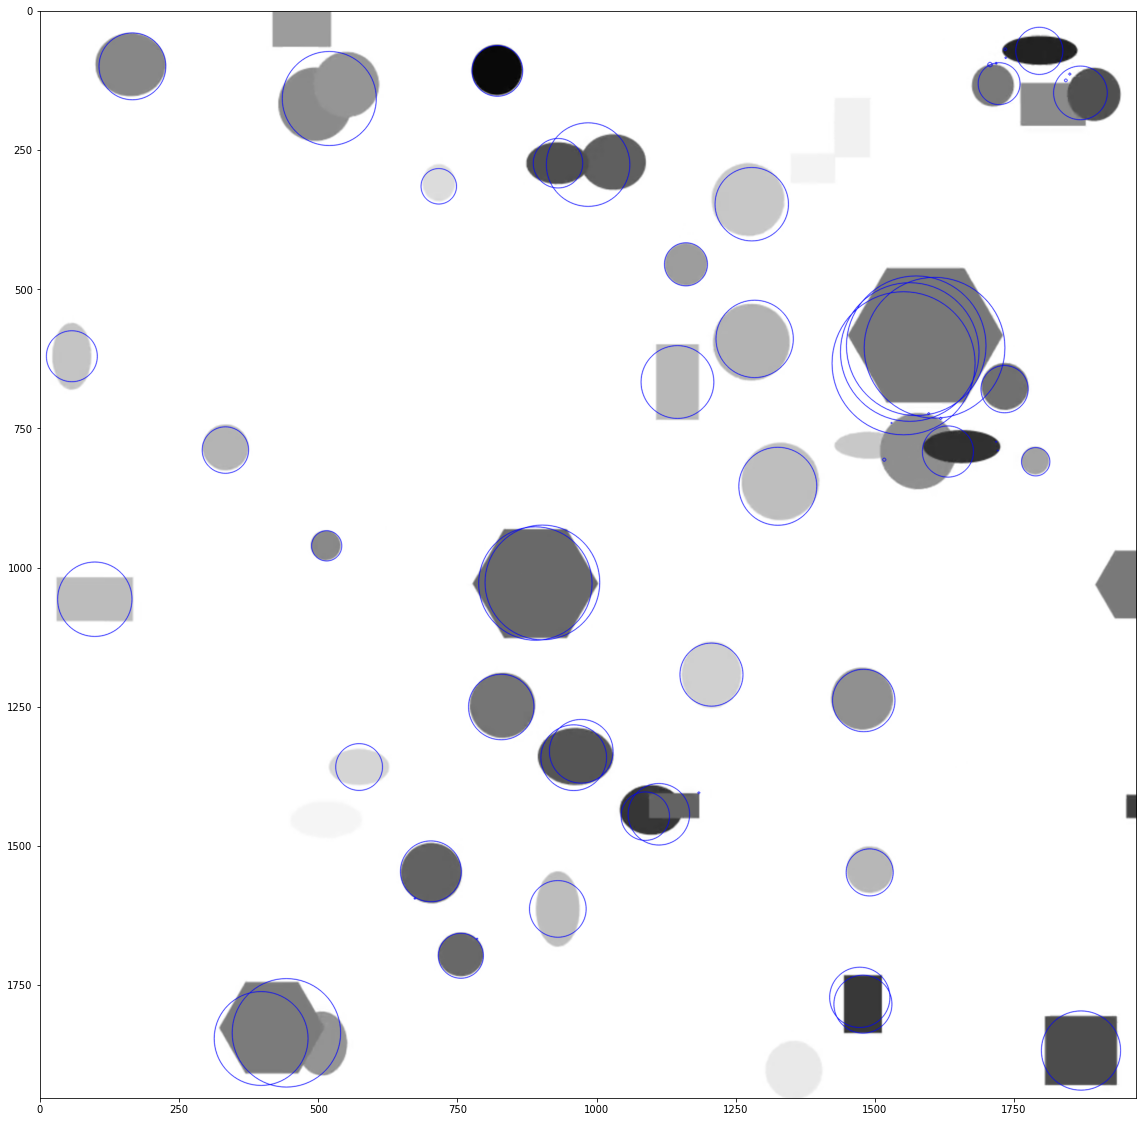

In [28]:

# Read image
image = cv2.imread("../Graphics/blob_shapes.png", cv2.IMREAD_GRAYSCALE)

# Setup SimpleBlobDetector parameters
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 0
params.maxThreshold = 255

# Filter by Area
params.filterByArea = False
params.minArea = 0
params.maxArea = 100000

# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0
params.maxCircularity = 1

# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0
params.maxConvexity = 1

# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0
params.maxInertiaRatio = 1


detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(image)

# Draw detected blobs as red circles
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of the blob
im_with_keypoints = cv2.drawKeypoints(image, keypoints, None, (0, 0, 255),
                                       cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig = plt.figure(figsize=(20, 20))
plt.imshow(im_with_keypoints)
